

# 数据集
https://www.kaggle.com/competitions/titanic/data

> It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.
预测这些结果是你的工作。对于测试集中的每一位乘客，使用你训练过的模型来预测他们是否在泰坦尼克号的沉没中幸存下来。



<br>
查看作为参考
https://www.kaggle.com/code/sayanroy729/titanic-eda-model-building


In [205]:
# !unzip titanic.zip

In [206]:
import numpy as np
import pandas as pd 
# 导入数据
data =pd.read_csv('titanic/train.csv')
# 查看前10条数据
data[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


除去名字，之后的剩余属性都可以作为x的值，是否存活作为y

In [207]:
# train_data = data.columns['']
type(data)

pandas.core.frame.DataFrame

In [208]:
train_data = data.loc[:,["Pclass",'Age','SibSp','Parch','Fare',"Embarked",'Survived']]
# train_data.index = data['PassengerId']
train_data[:5]

,Pclass,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,22.0,1,0,7.2500,S,0
1,1,38.0,1,0,71.2833,C,1
2,3,26.0,0,0,7.9250,S,1
3,1,35.0,1,0,53.1000,S,1
4,3,35.0,0,0,8.0500,S,0


In [209]:
# # 查看数据集的数量统计
# print(train_data.count())

# 检查数据集中是否存在数据为空的情况
train_data.isna().any()

Pclass      False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
Survived    False
dtype: bool

In [210]:
# 删除数据集中是空的情况
# 需要新建一个数组来存储/设置inplace = True
train_data.dropna(inplace=True)

In [211]:
train_data.count()

Pclass      712
Age         712
SibSp       712
Parch       712
Fare        712
Embarked    712
Survived    712
dtype: int64

In [212]:
# 检查删除空元素之后的是否还有null
train_data.isna().any()

Pclass      False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
Survived    False
dtype: bool

In [213]:
train_data[:5]

,Pclass,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,22.0,1,0,7.2500,S,0
1,1,38.0,1,0,71.2833,C,1
2,3,26.0,0,0,7.9250,S,1
3,1,35.0,1,0,53.1000,S,1
4,3,35.0,0,0,8.0500,S,0


In [214]:
type(train_data)

pandas.core.frame.DataFrame

.iloc具体用法
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html

## 先使用单一属性进行预测

In [215]:
X = train_data['Age']
y = train_data['Survived']
len(X)

712

In [216]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train ,y_test = train_test_split(X,y,test_size=0.2)

In [217]:

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(569,) (569,)
(143,) (143,)


## 搭建模型
线性模型
https://scikit-learn.org/stable/modules/linear_model.html

In [218]:
# x_train,x_test,,y_train,y_test = 
x_train = np.array(x_train).reshape(-1,1)
x_train.shape


(569, 1)

In [219]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(random_state = 72, class_weight={1:0.8})

logistic_reg.fit(x_train,y_train)

LogisticRegression(class_weight={1: 0.8}, random_state=72)

In [220]:
x_test = np.array(x_test).reshape(-1,1)

y_pred = logistic_reg.predict(x_test)
y_pred.shape

(143,)

In [221]:
y_test = np.array(y_test).reshape(-1,1)

y_test.shape

(143, 1)

In [222]:
# acc = logistic_reg.score(y_test,y_pred)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5944055944055944

In [223]:
x_test[:5]

array([[24.],
       [32.],
       [22.],
       [40.],
       [36.]])

In [224]:
# 数字为输入
single_test = np.array([60]).reshape(-1,1)
single_test.shape
logistic_reg.predict(single_test)

array([0])

**需要查找存活下来的年龄分布以及占总人数的多少**

In [225]:
train_data[:5]

,Pclass,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,22.0,1,0,7.2500,S,0
1,1,38.0,1,0,71.2833,C,1
2,3,26.0,0,0,7.9250,S,1
3,1,35.0,1,0,53.1000,S,1
4,3,35.0,0,0,8.0500,S,0


In [226]:
survived = train_data['Survived']
# 分类
survived.value_counts()


0    424
1    288
Name: Survived, dtype: int64

存活下来的比例✅

In [227]:
survived_true = survived.value_counts(1)
survived_true

0    0.595506
1    0.404494
Name: Survived, dtype: float64

In [228]:
survived_age = train_data[['Age','Survived']]
survived_age

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
...,...,...
885,39.0,0
886,27.0,0
887,19.0,1
889,26.0,1


获取存活下来的年纪分布✅

In [229]:
survived_age_true = survived_age.loc[survived_age['Survived']==1]
survived_age_true

,Age,Survived
1,38.0,1
2,26.0,1
3,35.0,1
8,27.0,1
9,14.0,1
...,...,...
875,15.0,1
879,56.0,1
880,25.0,1
887,19.0,1


<AxesSubplot:ylabel='Frequency'>

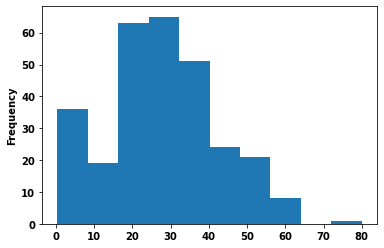

In [230]:
survived_age_true['Age'].plot(kind='hist')


In [231]:
# 数字为输入
single_test = np.array([30]).reshape(-1,1)
single_test.shape
logistic_reg.predict(single_test)

array([0])

# 基于KNN

In [232]:
import numpy as np
import pandas as pd 
# 导入数据
train_data =pd.read_csv('titanic/train.csv')
test_data = pd.read_csv('titanic/test.csv')

# 删除数据集中是空的情况
# 需要新建一个数组来存储/设置inplace = True
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)


In [233]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 12 to 414
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  87 non-null     int64  
 1   Pclass       87 non-null     int64  
 2   Name         87 non-null     object 
 3   Sex          87 non-null     object 
 4   Age          87 non-null     float64
 5   SibSp        87 non-null     int64  
 6   Parch        87 non-null     int64  
 7   Ticket       87 non-null     object 
 8   Fare         87 non-null     float64
 9   Cabin        87 non-null     object 
 10  Embarked     87 non-null     object 
dtypes: float64(2), int64(4), object(5)
memory usage: 8.2+ KB


In [234]:
train_data[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [235]:
df = train_data.drop(columns=['PassengerId','Name','Cabin','Embarked','SibSp','Parch','Ticket','Sex','Survived'])
# df.shape[:10]

In [236]:
y = train_data['Survived']


In [237]:
# X_train, y_train, X_test, y_test = train_test_split(df, y, test_size=0.2,)

x_train,x_test,y_train ,y_test = train_test_split(df,y,test_size=0.2)


KNN分类器

In [238]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(146, 3) (146,)
(37, 3) (37,)


In [239]:
X_train = np.array(x_train).reshape(-1,1)
X_test = np.array(x_test).reshape(-1,1)

In [240]:
x_train.shape

(146, 3)

In [241]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [242]:
y_train.shape

(146,)

In [243]:
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [244]:
x_test.shape

(37, 3)

In [245]:
y_pred = knn_classifier.predict(x_test)
y_pred.shape

(37,)

In [246]:
# y_test = np.array(y_test).reshape(-1,1)
# y_test = np.expand_dims(y_test,axis=0)
y_test.shape

(37,)

In [247]:
# 直接使用sklearn中的api查看精准度
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7297297297297297